<a href="https://colab.research.google.com/github/Ginnyisclever/Kaggle_Women_in_Data_Science_Analysis.ipynb/blob/Women_DS/Women_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploring Women in Data Science: Kaggle Survey (2019-2021)



This Jupyter Notebook explores the world-wide situation of Women in Data Science using the Kaggle Survey dataset from 2019 to 2021. The analysis covers:
- Data Import and Preparation
- Data Exploration
- Data Cleaning
- Data Analysis and Visualization
- Insight Synthesis

Focus Areas:
- Age Distribution
- Geographic Location
- Education Levels
- Job Titles and Roles
- Company Size and Involvement in Machine Learning
- Trends Over the Years (2019-2021)
- Years of Coding Experience: Women vs Men in DS

Libraries Used: Pandas, Matplotlib, Seaborn


## Data Import and Initial Exploration

In [23]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/Kaggle_survey.csv'
df = pd.read_csv(file_path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59146 entries, 0 to 59145
Columns: 174 entries, Time from Start to Finish (seconds) to Year of the Answer
dtypes: object(174)
memory usage: 78.5+ MB


<ipython-input-23-dcaf10513f7b>:3: DtypeWarning: Columns (0,28,39,52,63,74,86,90,104,119,125,135,146,171,173) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,...,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_OTHER,Year of the Answer
0,Duration (in seconds),What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education ...,What title is most similar to your current rol...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,...,Which of the following big data / analytics pr...,Which of the following big data / analytics pr...,Which of the following big data / analytics pr...,Which of the following big data / analytics pr...,Which of the following big data / analytics pr...,Which of the following big data / analytics pr...,Which of the following big data / analytics pr...,Which of the following big data / analytics pr...,Which of the following big data / analytics pr...,"Year of the Kaggle Survey Answer (2019, 2020 o..."
1,510,22-24,Man,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
2,423,40-44,Man,India,Professional degree/doctorate,Software Engineer,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
3,391,40-44,Man,Australia,Master’s degree,Other,"10,000 or more employees",20+,I do not know,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,2019
4,392,22-24,Man,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019



## Data Cleaning and Preparation

- Drop the first row which contains questions rather than data.
- Filter for respondents who identified as "Woman".
- Check for missing values.

In [10]:
# Drop the first row and reset the index
df_cleaned = df.drop(index=0).reset_index(drop=True)

# Filter for respondents who identified as "Woman"
women_df = df_cleaned[df_cleaned['Q2'] == 'Woman']

# Check for missing values in key columns
missing_values = women_df[['Q1', 'Q3', 'Q4', 'Q5', 'Q6', 'Q8', 'Year of the Answer']].isnull().sum()

# Display the number of missing values for each key column
missing_values

,0
Q1,0
Q3,0
Q4,0
Q5,0
Q6,4390
Q8,4528
Year of the Answer,0



## Age Distribution Analysis
- Younger age groups (22-24 and 25-29) dominate the field.
- There is less representation in older age groups (50+).

<ipython-input-27-ab2a213f9a09>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=women_df, x='Q1', order=women_df['Q1'].value_counts().index, palette='viridis')


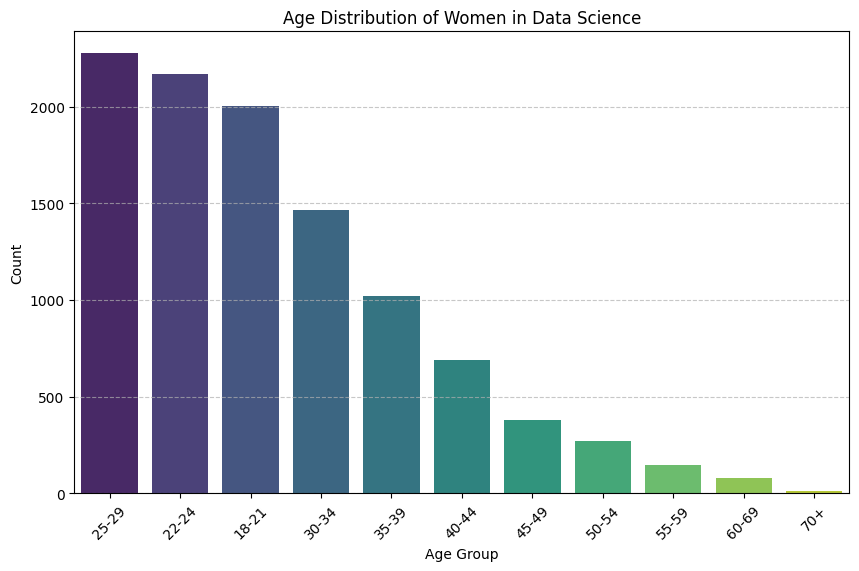

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age Distribution of Women in Data Science
plt.figure(figsize=(10, 6))
sns.countplot(data=women_df, x='Q1', order=women_df['Q1'].value_counts().index, palette='viridis')
plt.title('Age Distribution of Women in Data Science')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Geographic Distribution Analysis

- The USA, India, and Brazil have the highest representation.
- There is significant participation from Asia and South America.


<ipython-input-28-622055148d2b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


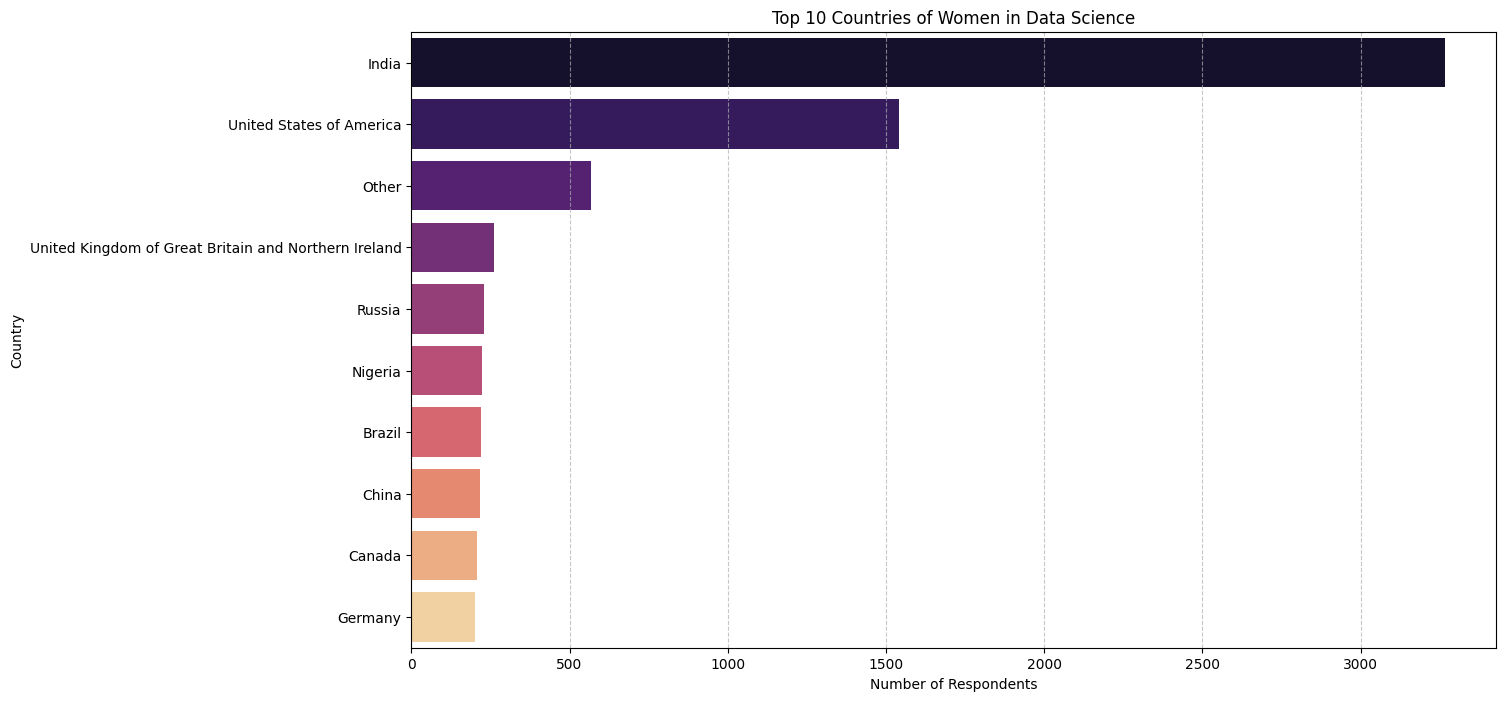

In [28]:
# Geographic Distribution of Women in Data Science
plt.figure(figsize=(14, 8))
top_countries = women_df['Q3'].value_counts().head(10)  # Top 10 countries
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries of Women in Data Science')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Job Titles and Roles

- Common roles include Data Scientist, Data Analyst, and Student.
- The high number of students suggests growing interest and future potential.

<ipython-input-30-2d7e4484834f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_roles.values, y=top_roles.index, palette='plasma')


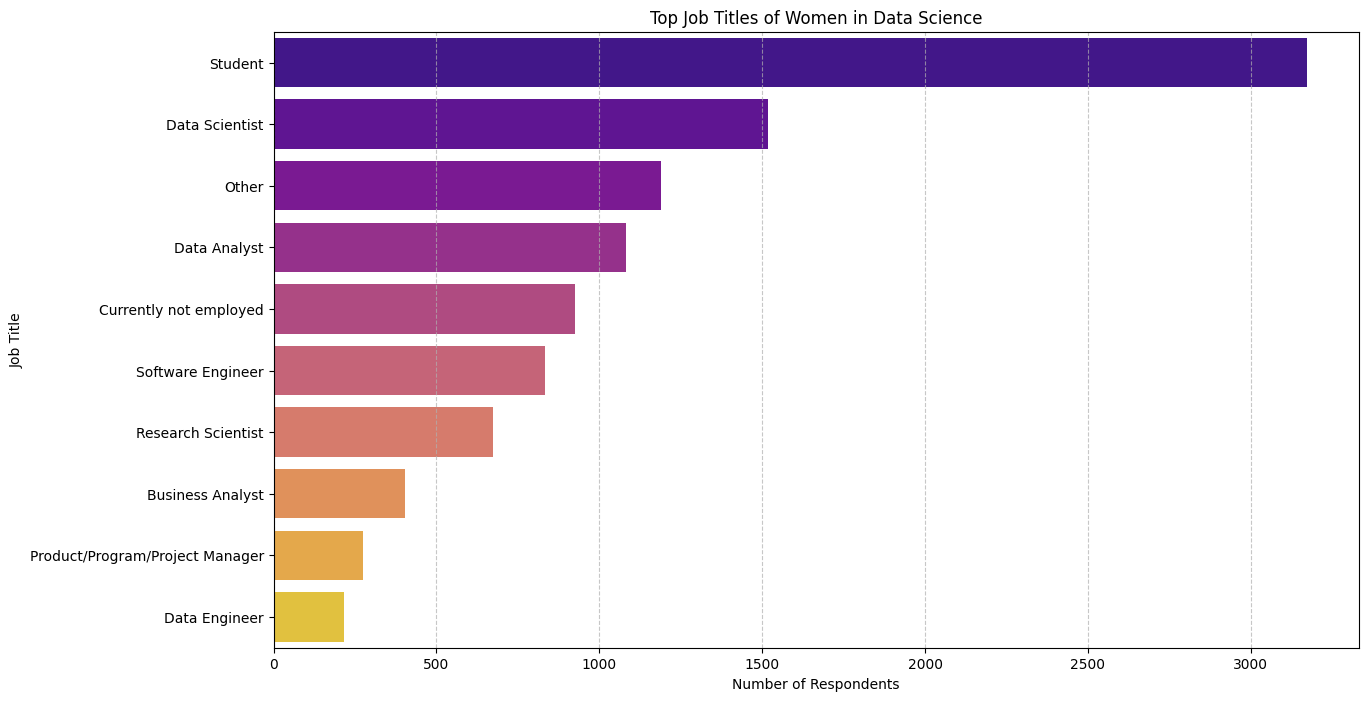

In [30]:
# Job Titles and Roles of Women in Data Science
plt.figure(figsize=(14, 8))
top_roles = women_df['Q5'].value_counts().head(10)  # Top 10 job titles
sns.barplot(x=top_roles.values, y=top_roles.index, palette='plasma')
plt.title('Top Job Titles of Women in Data Science')
plt.xlabel('Number of Respondents')
plt.ylabel('Job Title')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



## Education Levels Analysis

- Most women hold a Master’s degree, followed by a Bachelor’s degree.
- A notable number have a Doctorate, highlighting a strong academic background.

<ipython-input-21-9bffd31c2f80>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_levels.values, y=education_levels.index, palette='cool')


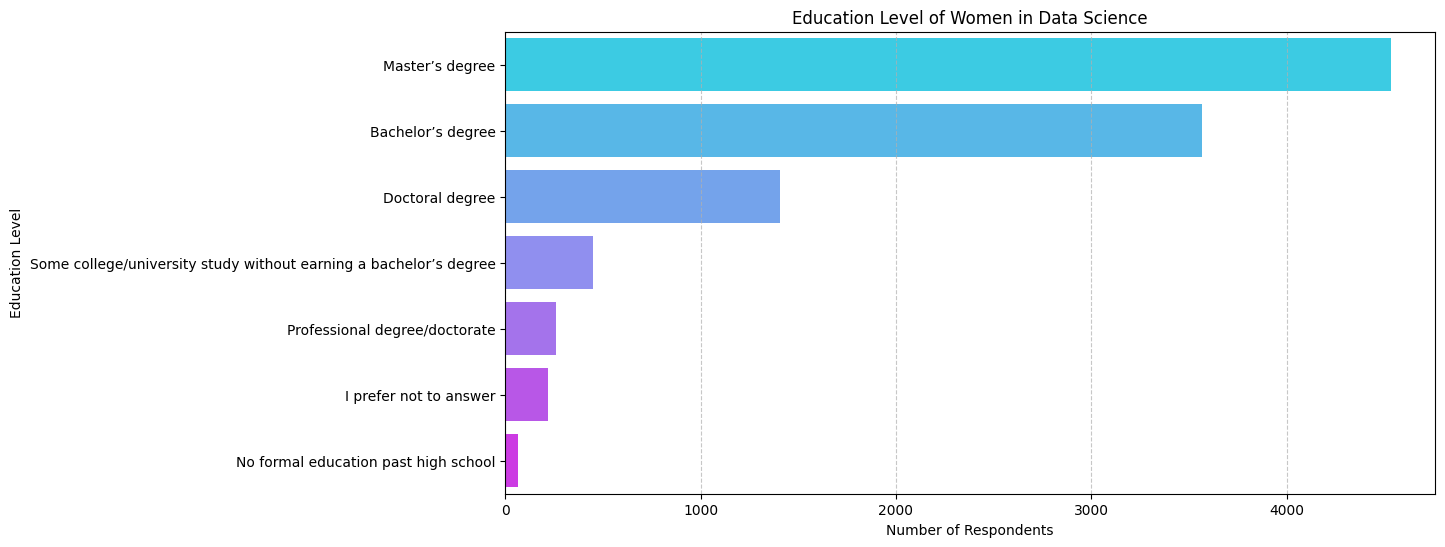

In [21]:
# Education Level of Women in Data Science
plt.figure(figsize=(12, 6))
education_levels = women_df['Q4'].value_counts()
sns.barplot(x=education_levels.values, y=education_levels.index, palette='cool')
plt.title('Education Level of Women in Data Science')
plt.xlabel('Number of Respondents')
plt.ylabel('Education Level')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Trends Over the Years (2019-2021)

- Participation of women is increasing year by year.
- Indicates growing gender diversity in Data Science.


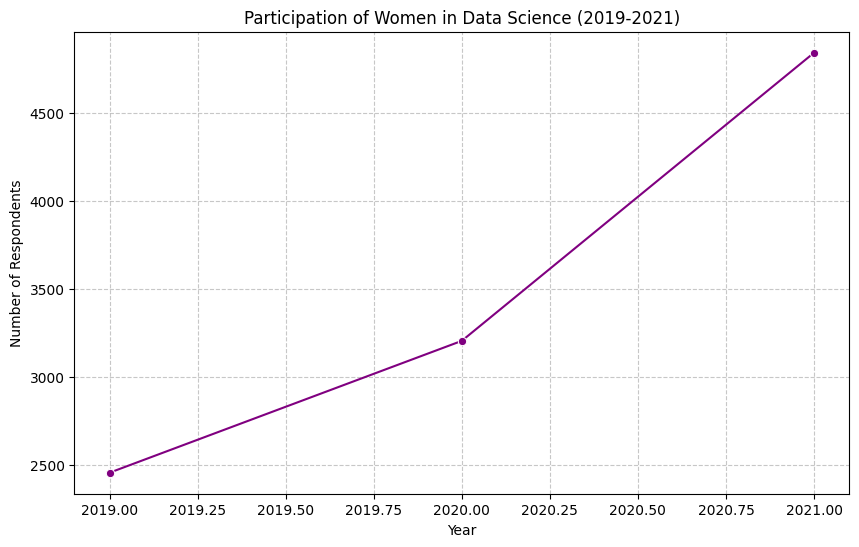

In [29]:
# Convert and clean the year column
women_df['Year of the Answer'] = pd.to_numeric(women_df['Year of the Answer'], errors='coerce')
women_df.dropna(subset=['Year of the Answer'], inplace=True)

# Trends Over the Years: Participation of Women in Data Science
plt.figure(figsize=(10, 6))
year_trend = women_df['Year of the Answer'].value_counts().sort_index()
sns.lineplot(x=year_trend.index, y=year_trend.values, marker='o', color='purple')
plt.title('Participation of Women in Data Science (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Respondents')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Years of Coding Experience: Women vs Men in DS

Insights from Experience Distribution:
- Women are more concentrated in early career stages (1-2 years and < 1 year) compared to men.
- There is a noticeable drop in female representation as experience increases.
- The gender gap widens at senior levels (10-20 years and 20+ years), indicating a potential career progression challenge for women in Data Science.

<ipython-input-25-03c0c65f2549>:8: DtypeWarning: Columns (0,28,39,52,63,74,86,90,104,119,125,135,146,171,173) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-25-03c0c65f2549>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Gender'] = df_relevant['Gender'].str.strip().str.lower()


Years of Coding Experience: Women vs Men in Data Science
                           Women    Men
Experience                             
1-2 years                   3090  12795
10-20 years                  610   4190
20+ years                    297   3339
3-5 years                   2043   9510
5-10 years                  1136   6168
< 1 years                   2740   9736
I have never written code    488   1355


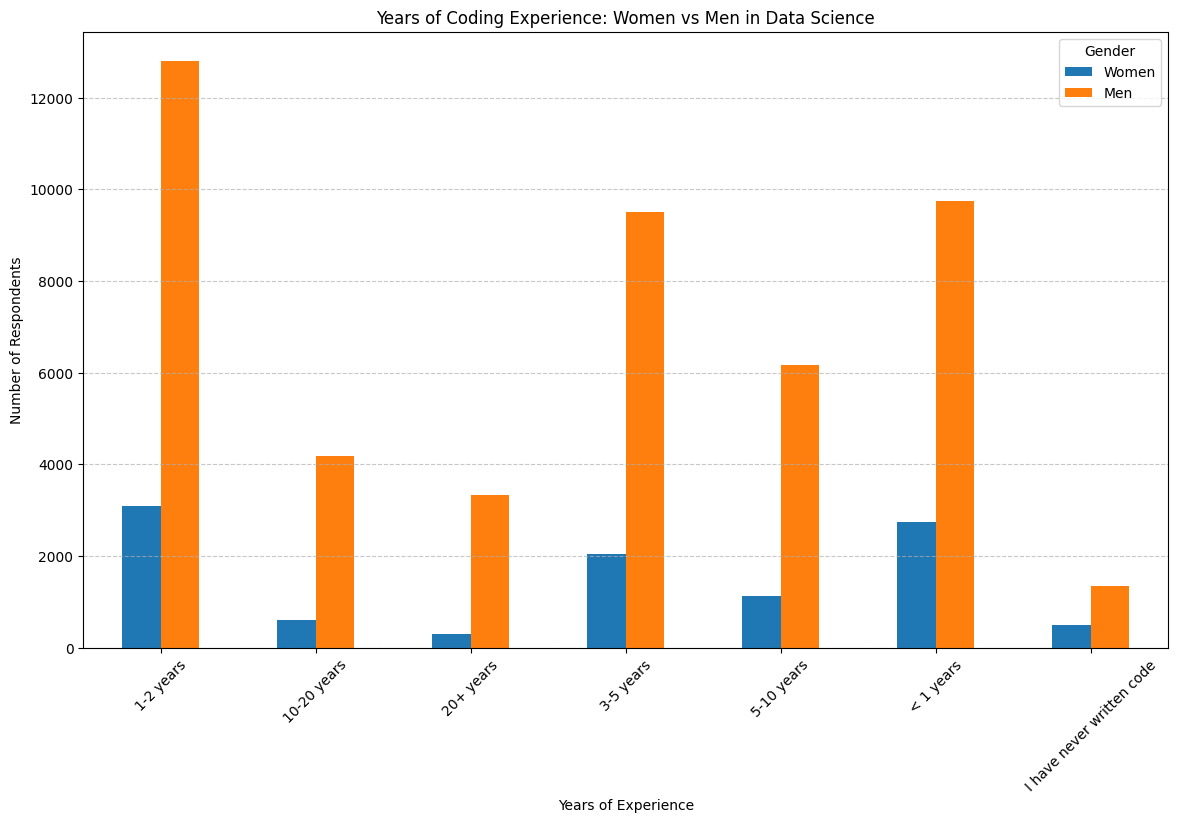

In [25]:
!pip install pandas matplotlib
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Kaggle_survey.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Select relevant columns
relevant_columns = ['Q2', 'Q15']
df_relevant = df[relevant_columns]

# Rename columns for better understanding
df_relevant.columns = ['Gender', 'Experience']

# Standardize gender labels
df_relevant['Gender'] = df_relevant['Gender'].str.strip().str.lower()

# Remove the invalid header row
df_cleaned = df_relevant[df_relevant['Gender'] != 'what is your gender?']

# Filter for only men and women for comparison
df_gender_filtered = df_cleaned[df_cleaned['Gender'].isin(['man', 'woman'])]

# Experience distribution for women
experience_women = df_gender_filtered[df_gender_filtered['Gender'] == 'woman']['Experience'].value_counts().sort_index()

# Experience distribution for men
experience_men = df_gender_filtered[df_gender_filtered['Gender'] == 'man']['Experience'].value_counts().sort_index()

# Combine the results into a DataFrame for comparison
experience_df = pd.DataFrame({
    'Women': experience_women,
    'Men': experience_men
}).fillna(0)

# Display the experience distribution
print("Years of Coding Experience: Women vs Men in Data Science")
print(experience_df)

# Plotting the experience distribution
experience_df.plot(kind='bar', figsize=(14, 8))
plt.title('Years of Coding Experience: Women vs Men in Data Science')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



## Insights and Summary of Findings

- Women’s participation in Data Science is increasing over the years (2019-2021).
- Younger age groups (22-24 and 25-29) dominate the field.
- The USA, India, and Brazil have the highest representation.
- Most women hold a Master’s degree or higher.
- Many women are not directly involved in ML, highlighting a gap in engagement.
- Women are concentrated at early career stages, with fewer women progressing to senior levels.

This analysis provides valuable insights into the state of Women in Data Science, informing strategies for inclusion and growth.

---
